In [93]:
#from google.colab import files
#uploaded = files.upload()

In [126]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv


--2023-10-06 07:51:15--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-10-06 07:51:15 (26.1 MB/s) - ‘moore.csv’ saved [2302/2302]



In [127]:
!ls


insurance_data.csv  moore.csv  sample_data


In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')
# read the csv file
df = pd.read_csv('moore.csv',header=None)
df.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [132]:
data = pd.read_csv('moore.csv',header=None).to_numpy()
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [133]:
X = data[:,0].reshape(-1,1)   #reshape to making N * D
Y = data[:,1]

In [135]:
Y

array([       2300,        3500,        2500,        2500,        4100,
              4500,        8000,        3510,        5000,        8500,
              6500,        9000,       29000,       17500,       29000,
             68000,       11500,       55000,      134000,       22000,
             63000,      190000,      275000,       25000,       16000,
            110000,      375000,       30000,      385000,      730000,
            273000,      553000,      180000,      250000,      600000,
           1000000,     1180235,      310000,     1200000,     1350000,
             35000,      600000,      900000,     2800000,     3100000,
            578977,     2500000,     2500000,      111000,     5500000,
           4300000,    10000000,     7500000,     8800000,     7500000,
           9500000,    13500000,    21000000,    21000000,    27400000,
          21300000,    22000000,    42000000,   191000000,    45000000,
          55000000,   112000000,   400000000,   169000000,   184

In [136]:
X

array([[1971],
       [1972],
       [1973],
       [1973],
       [1974],
       [1974],
       [1974],
       [1975],
       [1976],
       [1976],
       [1976],
       [1978],
       [1978],
       [1979],
       [1979],
       [1979],
       [1981],
       [1982],
       [1982],
       [1983],
       [1984],
       [1984],
       [1985],
       [1985],
       [1985],
       [1986],
       [1986],
       [1986],
       [1987],
       [1987],
       [1987],
       [1987],
       [1988],
       [1988],
       [1989],
       [1989],
       [1989],
       [1989],
       [1990],
       [1991],
       [1991],
       [1992],
       [1992],
       [1993],
       [1993],
       [1994],
       [1994],
       [1995],
       [1999],
       [1995],
       [1996],
       [1997],
       [1997],
       [1997],
       [1998],
       [1999],
       [1999],
       [2000],
       [2000],
       [1999],
       [1999],
       [1999],
       [2000],
       [2001],
       [2001],
       [2002],
       [20

In [137]:
X.shape


(162, 1)

In [138]:
Y.shape


(162,)

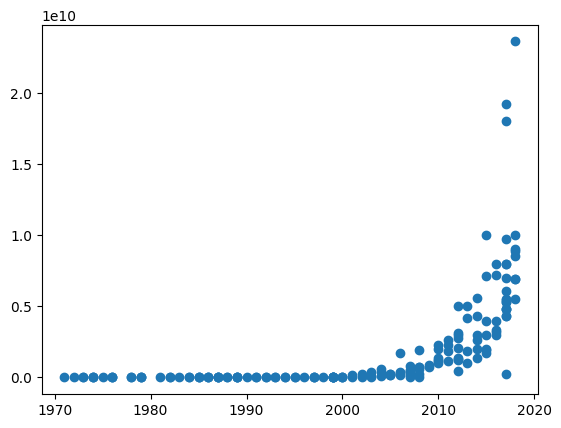

In [140]:
plt.scatter(X,Y);

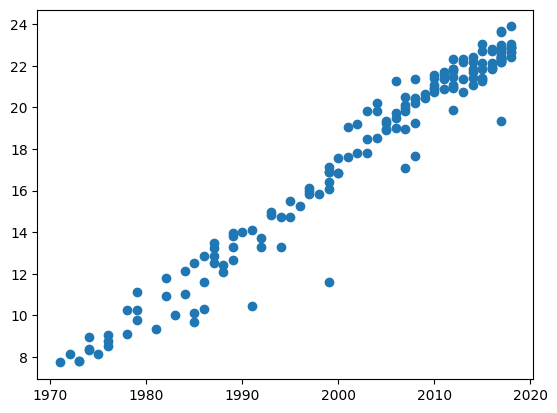

In [141]:
Y = np.log(Y)
plt.scatter(X,Y);

In [142]:
X = X - X.mean()

In [144]:
import tensorflow as tf
model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(1,)), tf.keras.layers.Dense(1)])

#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(1, activation='sigmoid',input_shape=(D,)))
##model.add(tf.keras.layers.Dense(32, activation='relu',input_shape=(D,)))




In [145]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.09), loss='mse',)    # 0.001 as learning rate and 0.09 as momentum

In [147]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [148]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 3ms/step - loss: 536.0585 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 312.7116 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 300.7514 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 311.4435 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 293.2725 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 298.8263 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 281.5589 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 267.8807 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 257.1193 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 250.9756 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 4ms/step - los

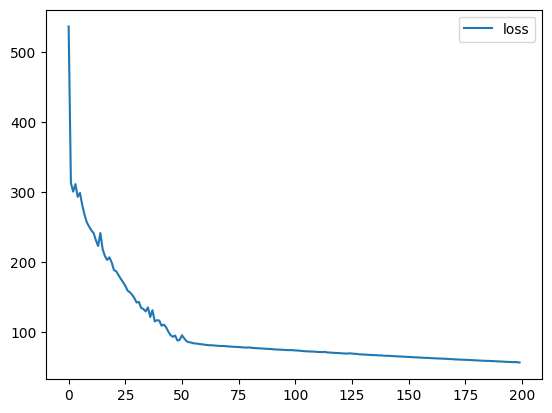

In [149]:
plt.plot(r.history['loss'], label='loss')
plt.legend();